<a href="https://colab.research.google.com/github/savanigit/OIBSIP/blob/task-2-submission/Task_2_Unemployment/Unemployment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# For better styling
plt.style.use('ggplot')
%matplotlib inline

print("Libraries imported!")

Libraries imported!


In [ ]:
# Replace 'Unemployment in India.csv' with the EXACT name of your file
df = pd.read_csv('Unemployment in India.csv')

# Let's check the first few rows
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
print(df.columns.tolist())


['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Area']


In [ ]:
# 1. Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# 2. Let's verify it worked
print(df.columns.tolist())

['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area']


In [ ]:
# Check how many empty rows we have
print(df.isnull().sum())

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64


In [ ]:
# Drop rows where EVERYTHING is missing
df = df.dropna()

# Check the size again to confirm they are gone
df.shape

(740, 7)

In [ ]:
# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Verify the change (look at Dtype)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


/tmp/ipython-input-848814447.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
# Add a new column for the Month Name
df['Month_Name'] = df['Date'].dt.month_name()

# Let's peek at the new column
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month_Name
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,June
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,July
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,August
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,September


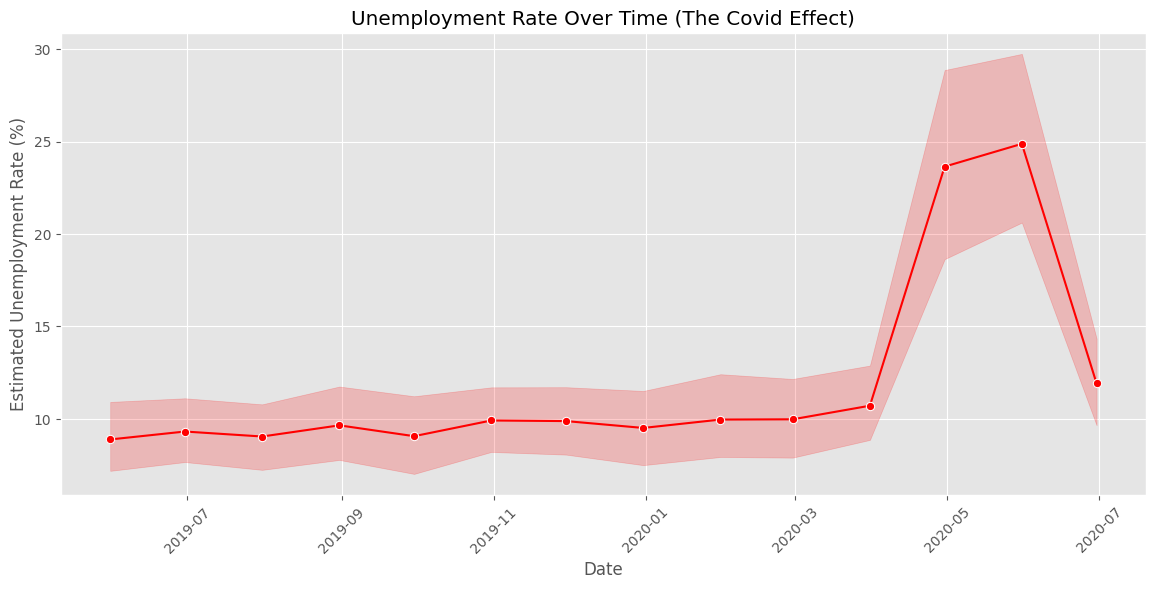

In [ ]:
plt.figure(figsize=(14, 6)) # Make the graph wide

# Plot Date vs Unemployment Rate
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', marker='o', color='red')

plt.title('Unemployment Rate Over Time (The Covid Effect)')
plt.xticks(rotation=45) # Tilt the dates so they don't overlap
plt.show()

/tmp/ipython-input-3042908572.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_avg.index, y=state_avg.values, palette='viridis')


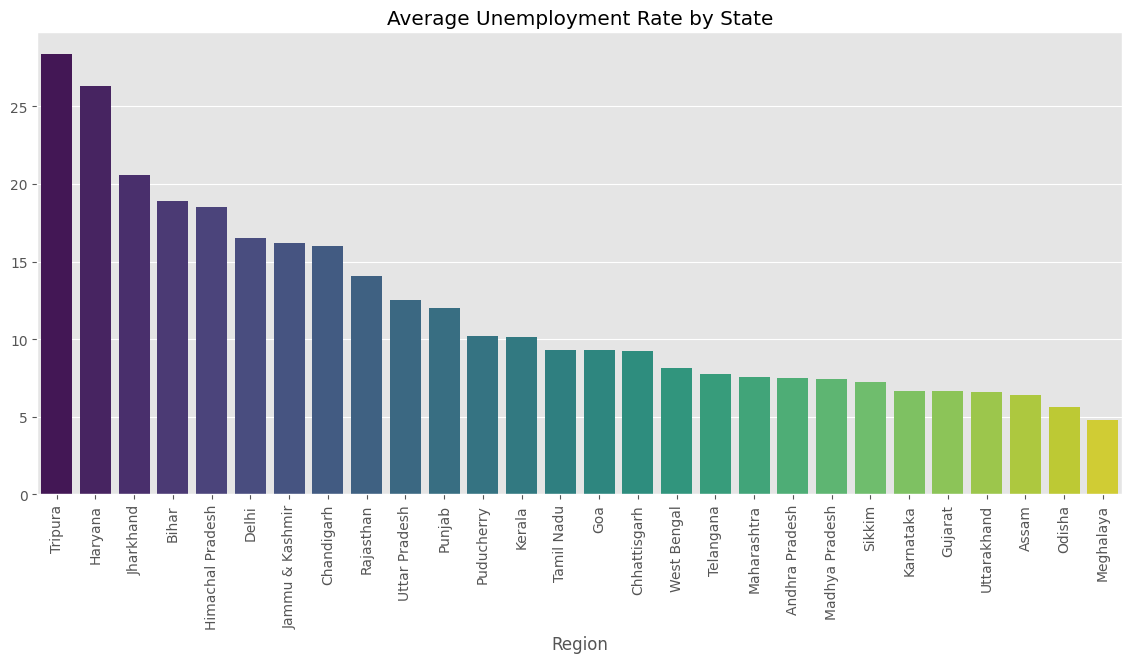

In [ ]:
plt.figure(figsize=(14, 6))

# Calculate average rate per Region
state_avg = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)

# Plot it
sns.barplot(x=state_avg.index, y=state_avg.values, palette='viridis')

plt.title('Average Unemployment Rate by State')
plt.xticks(rotation=90) # Rotate state names vertically
plt.show()